## Big Mart III

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.<br>
The aim is **to build a predictive model and find out the sales of each product at a particular store.**

Using this model, BigMart will try `to understand the properties of products` and `stores which play a key role in increasing sales`.


Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

#### Data
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

| Variable | Description
| :-------- | :-----------
| **Item_Identifier**| Unique product ID
| **Item_Weight** | Weight of product
| **Item_Fat_Content** | Whether the product is low fat or not
| **Item_Visibility** | The % of total display area of all products in a store allocated to the particular product
| **Item_Type** | The category to which the product belongs
| **Item_MRP** | Maximum Retail Price (list price) of the product
| **Outlet_Identifier** | Unique store ID
| **Outlet_Establishment_Year** | The year in which store was established
| **Outlet_Size** | The size of the store in terms of ground area covered
| **Outlet_Location_Type** | The type of city in which the store is located
| **Outlet_Type** | Whether the outlet is just a grocery store or some sort of supermarket
| **Item_Outlet_Sales** | Sales of the product in the particulat store. This is the outcome variable to be predicted.

#### Evaluation Metric:

Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in "SampleSubmission.csv".

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### What does Train.csv file contain?

In [3]:
data = pd.read_csv("train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print(data.shape)

(8523, 12)


### Some statistics figures from this data.

In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### How  should the submission look like?

In [22]:
sample = pd.read_csv("SampleSubmission.csv")
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,0
1,FDW14,OUT017,0
2,NCN55,OUT010,0
3,FDQ58,OUT017,0
4,FDY38,OUT027,0


___

## Exploratory Data Analysis

#### Any missing value?

In [36]:
data.isnull().sum()/len(data)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Yes, 17% of `Item_weigh` are missing and 28% of `Outlet_Size` are missing.

#### Replace missing value?

In [37]:
data['Item_Weight'].fillna(data['Item_Weight'].median(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

#### Ckeck any missing value?

In [38]:
data.isnull().sum()/len(data)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [39]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Ok, Missing/Replacing values step is Done!  Then, a little check about the variance within this dataset.

In [40]:
data.var()


Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

All variances are ok, except the `Item_Visibility` which have 0.00266 variance. Thus, the item doesn't have any impact. Then, it will be drop from the analysis.

In [41]:
# take off 'Item_Visibility'.

new_data = data.drop(['Item_Visibility'], axis=1)

#### Having a look on distribution of numeric items and correlation between them.

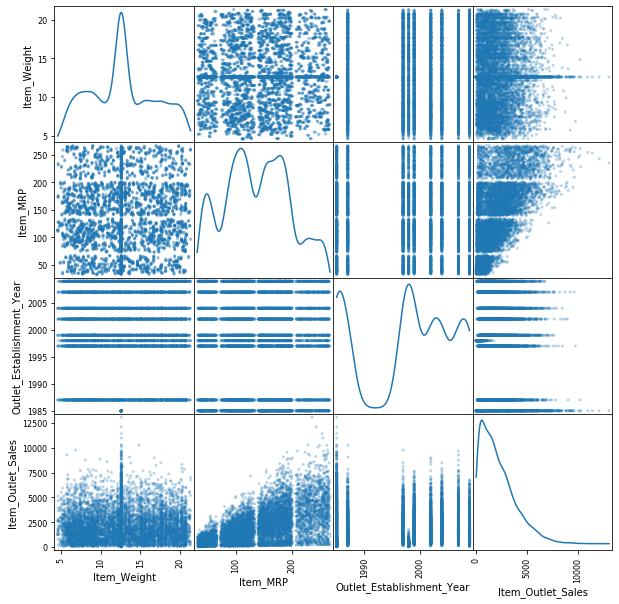

In [42]:
from pandas.plotting import scatter_matrix

scatter_matrix(new_data, alpha = 0.3, figsize = (10,10), diagonal = 'kde');

In [43]:
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
print(new_data.shape)

(8523, 11)


___

## Data Processing

#### Generate two dataset: 'sales_raw' with the target sales, 'features_raw' with the features as inputs.

In [45]:
sales_raw = new_data['Item_Outlet_Sales']
features_raw = new_data.drop('Item_Outlet_Sales', axis = 1)

In [46]:
print(features_raw.shape)

(8523, 10)


#### Normalization of data (features)

In [47]:
# Normalizing Numerical features
from sklearn.preprocessing import MinMaxScaler

# initialize a scaler, apply it to features_raw
scaler = MinMaxScaler() # default=(0,1)
numerical = ['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year']

features_rawminmax = pd.DataFrame(data = features_raw)
features_rawminmax[numerical] = scaler.fit_transform(features_raw[numerical])

/Users/mikehatchi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [48]:
features_rawminmax.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,0.282525,Low Fat,Dairy,0.927507,OUT049,0.583333,Medium,Tier 1,Supermarket Type1
1,DRC01,0.081274,Regular,Soft Drinks,0.072068,OUT018,1.000000,Medium,Tier 3,Supermarket Type2
2,FDN15,0.770765,Low Fat,Meat,0.468288,OUT049,0.583333,Medium,Tier 1,Supermarket Type1
3,FDX07,0.871986,Regular,Fruits and Vegetables,0.640093,OUT010,0.541667,Medium,Tier 3,Grocery Store
4,NCD19,0.260494,Low Fat,Household,0.095805,OUT013,0.083333,High,Tier 3,Supermarket Type1


In [49]:
features_wo_id = features_rawminmax.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1 )

#### None-numerical data

In [50]:
features_final = pd.get_dummies(features_wo_id)
encoded = list(features_final.columns)
print("{} total features".format(len(features_final)))

8523 total features


In [51]:
print(features_final.shape)

(8523, 34)


In [52]:
features_final.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.927507,0.583333,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.072068,1.000000,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.468288,0.583333,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.640093,0.541667,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.260494,0.095805,0.083333,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


___

#### For each feature find the data points with extreme high or low values
for feature in features_final.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(features_final[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(features_final[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    
    display(features_final[~((features_final[feature] >= Q1 - step) & (features_final[feature] <= Q3 + step))])

In [53]:
features_final.var()

Item_Weight                        0.063351
Item_MRP                           0.069869
Outlet_Establishment_Year          0.121678
Item_Fat_Content_LF                0.035706
Item_Fat_Content_Low Fat           0.240602
Item_Fat_Content_Regular           0.224094
Item_Fat_Content_low fat           0.012970
Item_Fat_Content_reg               0.013541
Item_Type_Baking Goods             0.070257
Item_Type_Breads                   0.028586
Item_Type_Breakfast                0.012741
Item_Type_Canned                   0.070357
Item_Type_Dairy                    0.073624
Item_Type_Frozen Foods             0.090358
Item_Type_Fruits and Vegetables    0.123670
Item_Type_Hard Drinks              0.024481
Item_Type_Health and Hygiene       0.057296
Item_Type_Household                0.095381
Item_Type_Meat                     0.047384
Item_Type_Others                   0.019438
Item_Type_Seafood                  0.007454
Item_Type_Snack Foods              0.120986
Item_Type_Soft Drinks           

In [61]:
from sklearn.decomposition import PCA
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=4)

pca.fit(features_final)

print(pca.components_)
print(pca.explained_variance_)

Transform features_final using the PCA fit above
transf_data = pca.transform(features_final)

print(transf_data)

[[-9.49674284e-04 -2.34442939e-03 -9.59412024e-02  3.01651815e-03
  -9.52674322e-03  5.08146654e-03  9.98804050e-04  4.29954481e-04
  -1.36913517e-03  8.25146211e-04  8.00324462e-04 -1.48334594e-03
  -2.62410000e-03 -4.25760800e-03  5.46136601e-03  5.51587577e-04
   3.19437424e-03 -6.90031086e-04  4.77172817e-03 -1.50153276e-03
  -2.84965995e-04 -3.02822507e-04 -2.71528642e-03 -3.75698797e-04
   4.52239748e-02  3.36429361e-01 -3.81653335e-01 -2.52232471e-01
  -2.89139878e-01  5.41372348e-01  6.32410718e-02 -4.56057042e-01
   1.85868914e-01  2.06947056e-01]
 [-9.12722771e-04  1.25684033e-03 -3.58113848e-01  6.25881346e-03
  -1.32359737e-01  1.23593091e-01  2.88335318e-03 -3.75520249e-04
   8.98375050e-03  1.32002832e-03  3.34135962e-03  2.25460673e-03
   7.82802903e-03  8.32280986e-03  1.18632270e-02 -8.39169046e-03
  -1.38582080e-02 -2.44067235e-02  1.20858099e-02 -9.95743105e-04
   6.09102757e-04  1.93456155e-03 -9.08711265e-03 -1.80380756e-03
   1.17279584e-01 -4.48014814e-01  3.3073